In [2]:
import fastbook
from fastbook import load_learner
from fastai.vision.all import *
fastbook.setup_book()

import pathlib
plt = platform.system()
if plt == 'Linux': pathlib.WindowsPath = pathlib.PosixPath

In [3]:
# cat colors - for now, keeping it basic with tricolor, red, black, white
# expand later to include: separate calico/tortie, dilutions (blue, cream, apricot, cinnamon, fawn, lilac, dilute tricolors), silver, smoke)

base_cat_colors = 'Black Base', 'Tricolor', 'Chocolate Base', 'Red Base', 'White Solid'
path = Path('cat colors')
fns = get_image_files(path)
fns

(#611) [Path('cat colors/Black Base/01e44716-04a9-4073-b15b-864022d5aba5.jpg'),Path('cat colors/Black Base/04c17126-c7db-48a9-bbce-74334f8f2b35.jpg'),Path('cat colors/Black Base/072803fb-dd88-4b48-bcd8-df9e55fe145c.jpg'),Path('cat colors/Black Base/0760dd63-1eac-47ec-88bb-fd6811b232d4.jpg'),Path('cat colors/Black Base/09a30e04-c645-4119-b11f-a5a39aea24f1.jpg'),Path('cat colors/Black Base/0d1dc60f-d45c-47bb-bab2-e853585491bf.png'),Path('cat colors/Black Base/0e22f6b4-50af-498a-afad-b136fc191b35.jpg'),Path('cat colors/Black Base/0ef4032d-7eae-45b6-b5f9-8cebd0c80e01.jpeg'),Path('cat colors/Black Base/106d7cd2-87ab-4e9b-8694-b11367306abf.jpg'),Path('cat colors/Black Base/11de416f-6606-44ab-9a6f-76287c106c9d.jpg')...]

In [4]:
failed = verify_images(fns)
failed

(#0) []

In [5]:
pattern = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=1004),
    get_y=parent_label,
    item_tfms=Resize(128))

In [6]:
cats = pattern.new(item_tfms=RandomResizedCrop(224, min_scale=0.3), batch_tfms=aug_transforms())
dls = cats.dataloaders(path)

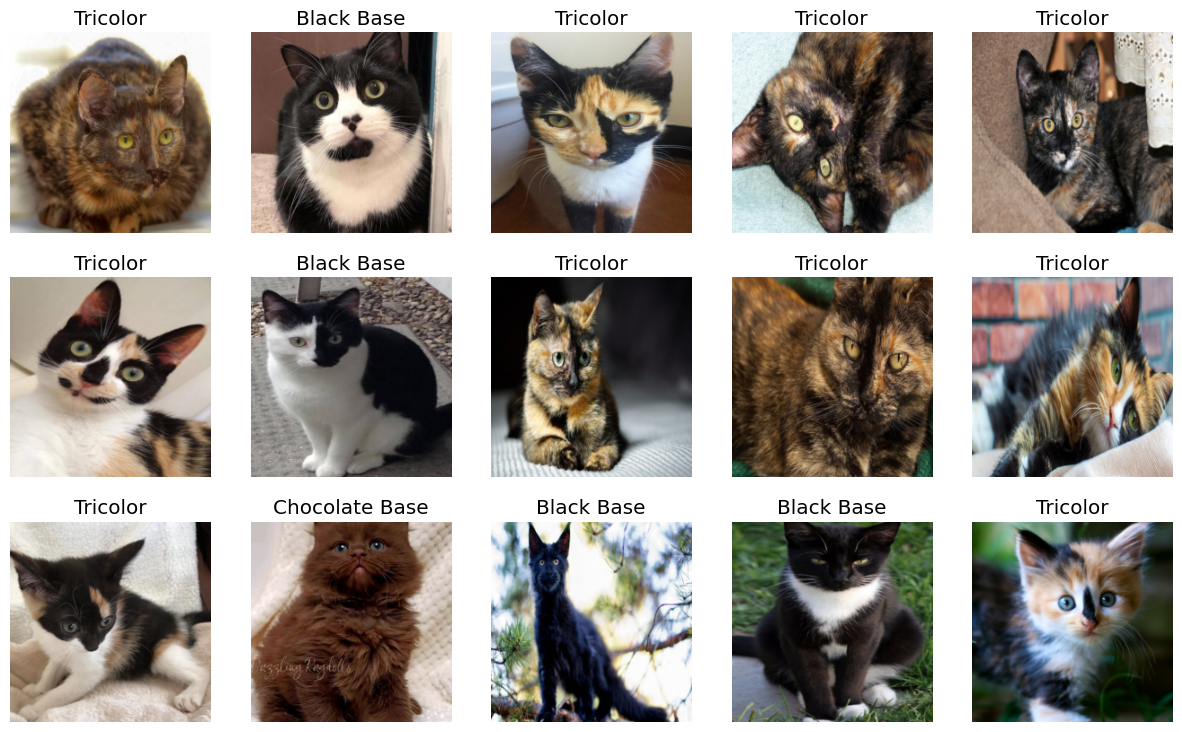

In [8]:
dls.valid.show_batch(max_n=15, nrows=3)

In [10]:
learner = vision_learner(dls, resnet34, metrics = error_rate)
learner.fine_tune(30)

epoch,train_loss,valid_loss,error_rate,time
0,2.298337,1.232432,0.442623,00:26


epoch,train_loss,valid_loss,error_rate,time


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(5, nrows=5)